# Credit Card Fraud Detection

### Data: Number of Instances: 30000

In [1]:
# loading library
import pandas as pd
import numpy as np

#model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Visualization
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from termcolor import colored as cl # text customization

### Import Data

In [2]:
# loading data
# create URL

# load dataset
dataframe = pd.read_excel("/Users/wangtingting/Documents/763-Project/default of credit card clients.xls", 
                          sheet_name = 0, header =1)

# view first two row
dataframe.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
dataframe.shape

(30000, 25)

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
dataframe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
# remove useless column
data_after_drop=dataframe.drop(['ID'], axis=1)
#There are 15 columns left
data_after_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
# check missing values
data_after_drop[data_after_drop['default payment next month'].isnull()].count()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
# rename target column 
df = data_after_drop.rename(columns={'default payment next month':'default_payment_next_month'})

#concatenate dataframe by column

df1 = df.copy()

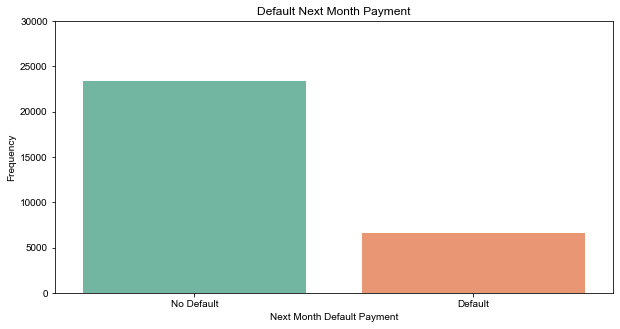

In [9]:
# check target balance or unbalance?
plt.title('Default Next Month Payment')
ax = sns.countplot(x = df.default_payment_next_month ,palette="Set2")
sns.set(font_scale= 1.0)
ax.set_ylim(top = 30000)
ax.set_xticklabels(['No Default','Default'])
ax.set_xlabel('Next Month Default Payment')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)

plt.show()

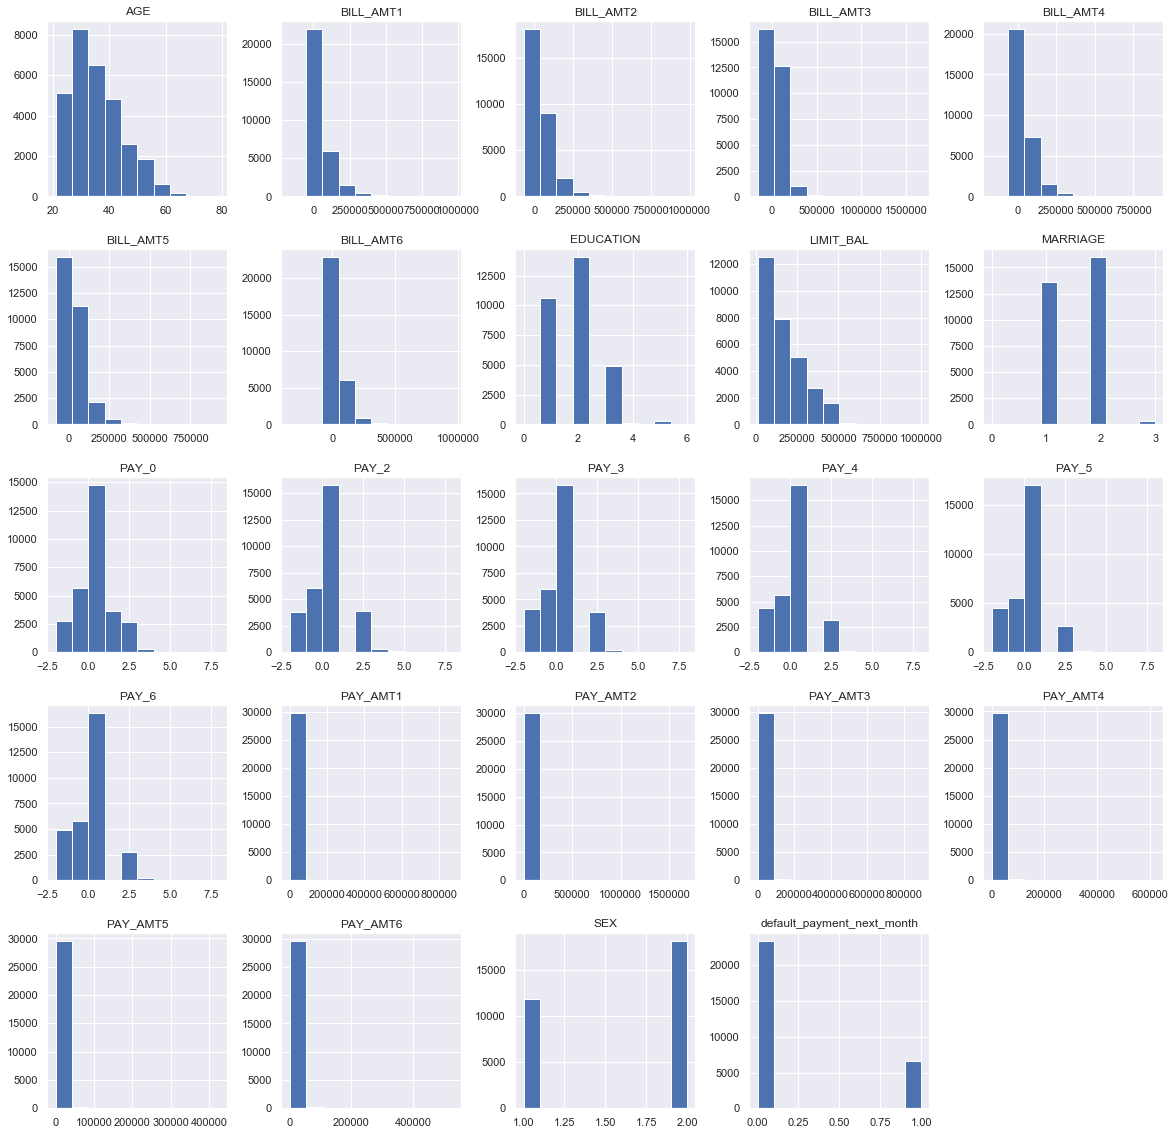

In [10]:
# plot the histogram of each parameter
df.hist(figsize = (20, 20))
plt.show()

In [11]:
# delay pay
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


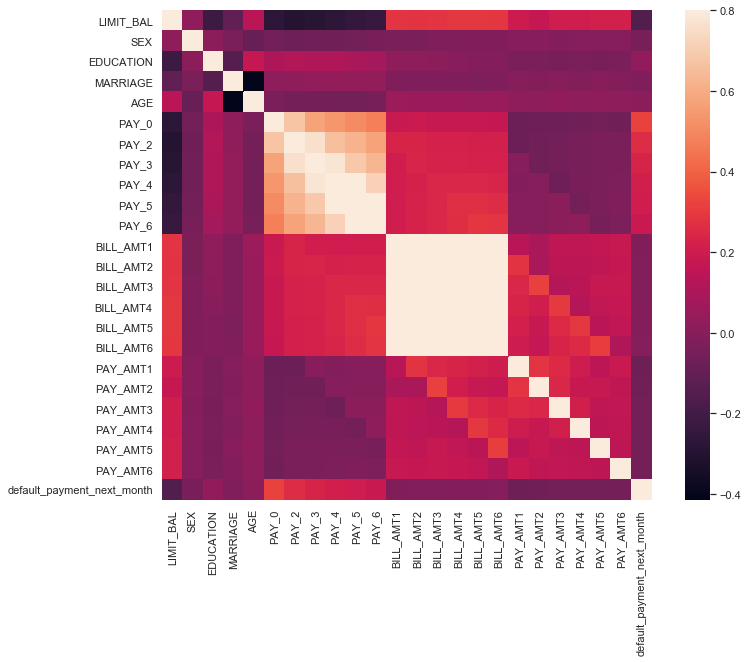

In [12]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

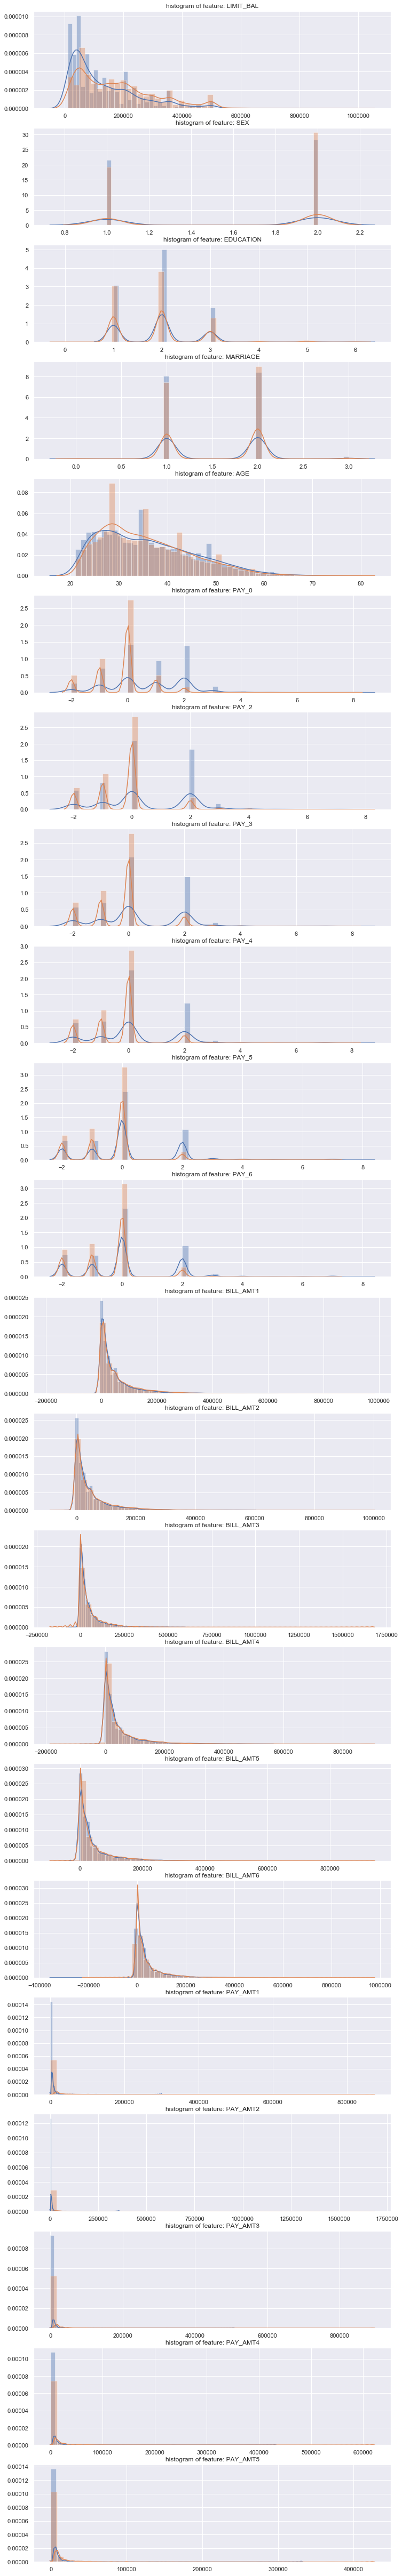

In [13]:
# distribution of anomalous features
features = df.iloc[:,0:22].columns
plt.figure(figsize=(12, 22*4))
gs = gridspec.GridSpec(22, 1)
for i, c in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[c][df['default_payment_next_month'] == 1], bins=50)
    sns.distplot(df[c][df['default_payment_next_month'] == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

In [14]:
# replace 1 (male) and 2(female) in 'sex' to 1(male) and 0(female)
SEX = df['SEX'].replace([1,2],[1,0])
df['SEX'] = SEX

In [15]:
# check max age
df['AGE'].max()

79

In [16]:
# check min age
df['AGE'].min()

21

In [17]:
# 1. Discretize variable into equal-sized buckets 
group_names=['under_30', '31to40', '41to50', '51to60','over60']
df["AGE"] = pd.qcut(df["AGE"],5, labels=group_names)

# 2. View df
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,0,2,1,under_30,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,2,2,under_30,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,2,2,41to50,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,2,1,41to50,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,over60,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
# 3. View the number of default payment in each bucket. 
df[["AGE","default_payment_next_month"]].groupby(["AGE"],as_index = False).sum().sort_values(by="AGE",ascending=True)

,AGE,default_payment_next_month
0,under_30,1598
1,31to40,1102
2,41to50,1380
3,51to60,1100
4,over60,1456


In [19]:
# Age group: dummy variable
dum_df_age = pd.get_dummies(df["AGE"])

# merge with main df on key values
data_after_dummy_age = pd.concat([df, dum_df_age], axis=1)

# drop AGE column
data_after_dummy_age=data_after_dummy_age.drop(["AGE"], axis=1)

# drop one dummy variable 'over60'
data_after_dummy_age=data_after_dummy_age.drop(["over60"], axis=1)

data_after_dummy_age

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,under_30,31to40,41to50,51to60
0,20000,0,2,1,2,2,-1,-1,-2,-2,...,689,0,0,0,0,1,1,0,0,0
1,120000,0,2,2,-1,2,0,0,0,2,...,1000,1000,1000,0,2000,1,1,0,0,0
2,90000,0,2,2,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,1,0
3,50000,0,2,1,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,1,0
4,50000,1,2,1,-1,0,-1,0,0,0,...,36681,10000,9000,689,679,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,0,0,0,0,0,0,...,20000,5003,3047,5000,1000,0,0,0,0,1
29996,150000,1,3,2,-1,-1,-1,-1,0,0,...,3526,8998,129,0,0,0,0,0,0,1
29997,30000,1,2,2,4,3,2,-1,0,0,...,0,22000,4200,2000,3100,1,0,0,1,0
29998,80000,1,3,1,1,-1,0,0,0,-1,...,3409,1178,1926,52964,1804,1,0,0,0,1


In [20]:
# dummy variable - EDUCATION column
data_after_dummy_age['EDUCATION'].replace({1:"graduate_school", 2:"university", 3:"high school", 4:"others"}, inplace=True)
dum_df = pd.get_dummies(data_after_dummy_age["EDUCATION"],prefix="EDUCATION")

# merge with main df on key values
data_after_dummy_EDUCATION = pd.concat([data_after_dummy_age, dum_df], axis=1)
data_0=data_after_dummy_EDUCATION.drop(["EDUCATION"], axis=1)
data_0

,LIMIT_BAL,SEX,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,31to40,41to50,51to60,EDUCATION_0,EDUCATION_5,EDUCATION_6,EDUCATION_graduate_school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,20000,0,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,2,-1,2,0,0,0,2,2682,...,0,0,0,0,0,0,0,0,0,1
2,90000,0,2,0,0,0,0,0,0,29239,...,0,1,0,0,0,0,0,0,0,1
3,50000,0,1,0,0,0,0,0,0,46990,...,0,1,0,0,0,0,0,0,0,1
4,50000,1,1,-1,0,-1,0,0,0,8617,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,1,0,0,0,0,0,0,188948,...,0,0,1,0,0,0,0,1,0,0
29996,150000,1,2,-1,-1,-1,-1,0,0,1683,...,0,0,1,0,0,0,0,1,0,0
29997,30000,1,2,4,3,2,-1,0,0,3565,...,0,1,0,0,0,0,0,0,0,1
29998,80000,1,1,1,-1,0,0,0,-1,-1645,...,0,0,1,0,0,0,0,1,0,0


In [21]:
# dummy variable - MARRIAGE column
data_0['MARRIAGE'].replace({1:"married", 2:"single", 3:"others"}, inplace=True)
dum_df = pd.get_dummies(data_0["MARRIAGE"],prefix="MARRIAGE")
dum_df

,MARRIAGE_0,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
29995,0,1,0,0
29996,0,0,0,1
29997,0,0,0,1
29998,0,1,0,0


In [22]:
# merge with main df on key values
data_after_dummy_MARRIAGE = pd.concat([data_0, dum_df], axis=1)
data_1 = data_0.drop(["MARRIAGE"], axis=1)
data_1

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,31to40,41to50,51to60,EDUCATION_0,EDUCATION_5,EDUCATION_6,EDUCATION_graduate_school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,20000,0,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,0,0,0,0,1
2,90000,0,0,0,0,0,0,0,29239,14027,...,0,1,0,0,0,0,0,0,0,1
3,50000,0,0,0,0,0,0,0,46990,48233,...,0,1,0,0,0,0,0,0,0,1
4,50000,1,-1,0,-1,0,0,0,8617,5670,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,0,0,0,0,0,0,188948,192815,...,0,0,1,0,0,0,0,1,0,0
29996,150000,1,-1,-1,-1,-1,0,0,1683,1828,...,0,0,1,0,0,0,0,1,0,0
29997,30000,1,4,3,2,-1,0,0,3565,3356,...,0,1,0,0,0,0,0,0,0,1
29998,80000,1,1,-1,0,0,0,-1,-1645,78379,...,0,0,1,0,0,0,0,1,0,0


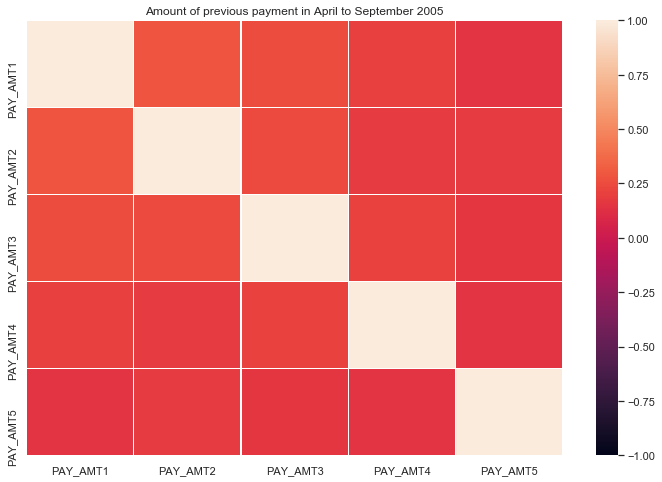

In [23]:
# check the correlation of Amount of previous payment in April to September 2005.

var1 = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (12,8))
plt.title('Amount of previous payment in April to September 2005')
corr = data_1[var1].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

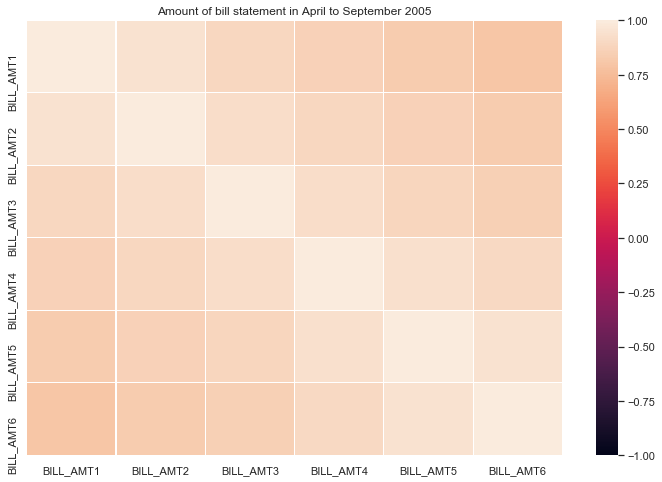

In [24]:
# check the correlation of Amount of bill statement in April to September 2005.

var2 = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (12,8))
plt.title('Amount of bill statement in April to September 2005')
corr = data_1[var2].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

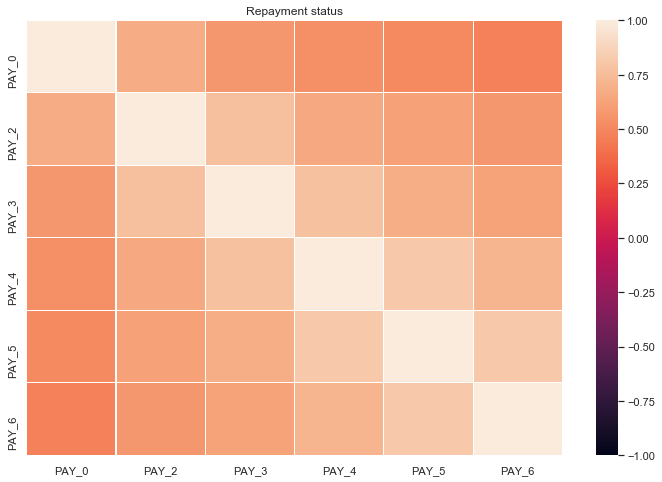

In [25]:
# check the correlation between Repayment status in April to September 2005.

var3 = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (12,8))
plt.title('Repayment status')
corr = data_1[var3].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = .1, vmin = -1, vmax = 1)
plt.show()

In [26]:
data_1.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month',
       'under_30', '31to40', '41to50', '51to60', 'EDUCATION_0', 'EDUCATION_5',
       'EDUCATION_6', 'EDUCATION_graduate_school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university'],
      dtype='object')

In [27]:
#StandardScaller is being used to normalize the features
from sklearn.preprocessing import StandardScaler

standardized_features = ['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                         'PAY_0',  'PAY_2',  'PAY_3',  'PAY_4', 'PAY_5', 'PAY_6',
                         'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

numeric_features = data_1[standardized_features]
sc = StandardScaler()
standardized = pd.DataFrame(sc.fit_transform(numeric_features))
standardized.columns = ['LIMIT_BAL',
                         'PAY_0',
                         'PAY_2',
                         'PAY_3',
                         'PAY_4',
                         'PAY_5',
                         'PAY_6',
                         'BILL_AMT1',
                         'BILL_AMT2',
                         'BILL_AMT3',
                         'BILL_AMT4',
                         'BILL_AMT5',
                         'BILL_AMT6',
                         'PAY_AMT1',
                         'PAY_AMT2',
                         'PAY_AMT3',
                         'PAY_AMT4',
                         'PAY_AMT5',
                         'PAY_AMT6']

df = data_1.copy()
df[standardized_features] = standardized

In [28]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month',
       'under_30', '31to40', '41to50', '51to60', 'EDUCATION_0', 'EDUCATION_5',
       'EDUCATION_6', 'EDUCATION_graduate_school', 'EDUCATION_high school',
       'EDUCATION_others', 'EDUCATION_university'],
      dtype='object')

In [29]:
df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [30]:
# Balance dataset 
arr_1 = df[df['default_payment_next_month'] == 1].sample(n = 5000)
arr_2 = df[df['default_payment_next_month'] == 0].sample(n = 5000)

frames = [arr_1, arr_2]
df = pd.concat(frames)
df=df.sample(frac=1)

### After balance

In [31]:
df['default_payment_next_month'].value_counts()

1    5000
0    5000
Name: default_payment_next_month, dtype: int64

In [32]:
# check up the target and features
X = df.drop(['default_payment_next_month'], axis=1)

In [33]:
y = df['default_payment_next_month']

In [34]:
#importing libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [35]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y) # 80% training and 20% test

## MODEL - Logistic

In [36]:
# load library
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import l1_min_c
from time import time
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import lasso_path
from sklearn.model_selection import KFold, cross_val_score

In [37]:
lasso = linear_model.Lasso(alpha=0.03)
lasso_reg = lasso.fit(X_train, y_train)
X_train.columns
lasso_reg.intercept_, lasso_reg.coef_

(0.47088242529824703,
 array([-0.02018696,  0.        ,  0.10988769,  0.01506484,  0.00837626,
         0.        ,  0.        ,  0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.00070207,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
         0.        , -0.        , -0.        ,  0.        , -0.        ,
        -0.        , -0.        , -0.        ,  0.        , -0.        ,
         0.        ]))

In [38]:
l_predict = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, l_predict)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse    #Lower is better.
l_crossv = cross_val_score(lasso, X_train, y_train, cv=10)
print(cross_val_score(lasso, X_train, y_train, cv=10))
l_crossv.mean()
l_crossv.std()

[0.13711867 0.09803108 0.12414974 0.14265016 0.12827235 0.10508337
 0.15660877 0.12328215 0.13544468 0.07710907]


0.02224636460901623

array([5.00000000e+00, 4.55581378e+00, 4.15108784e+00, 3.78231664e+00,
       3.44630605e+00, 3.14014572e+00, 2.86118383e+00, 2.60700414e+00,
       2.37540508e+00, 2.16438064e+00, 1.97210303e+00, 1.79690683e+00,
       1.63727458e+00, 1.49182362e+00, 1.35929412e+00, 1.23853818e+00,
       1.12850986e+00, 1.02825615e+00, 9.36908711e-01, 8.53676324e-01,
       7.77838072e-01, 7.08737081e-01, 6.45774833e-01, 5.88405976e-01,
       5.36133611e-01, 4.88504979e-01, 4.45107543e-01, 4.05565415e-01,
       3.69536102e-01, 3.36707533e-01, 3.06795364e-01, 2.79540509e-01,
       2.54706901e-01, 2.32079442e-01, 2.11462144e-01, 1.92676430e-01,
       1.75559587e-01, 1.59963357e-01, 1.45752653e-01, 1.32804389e-01,
       1.21006413e-01, 1.10256537e-01, 1.00461650e-01, 9.15369140e-02,
       8.34050269e-02, 7.59955541e-02, 6.92443186e-02, 6.30928442e-02,
       5.74878498e-02, 5.23807876e-02, 4.77274228e-02, 4.34874501e-02,
       3.96241449e-02, 3.61040451e-02, 3.28966612e-02, 2.99742125e-02,
      

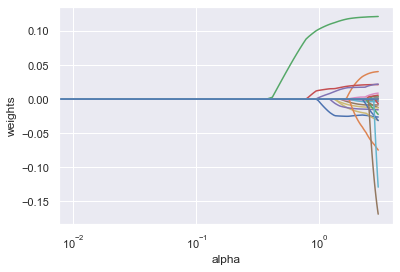

In [39]:
coefs = []
alphas = 10**np.linspace(1,-3,100)*0.5
alphas
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(-np.log10(alphas*2), coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
10**np.linspace(1,-3,100)*0.5

In [40]:
eps = 5e-2  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps=eps, fit_intercept=True)

Computing regularization path using the lasso...


array([0.30097008, 0.29199916, 0.28329564, 0.27485154, 0.26665913,
       0.25871091, 0.2509996 , 0.24351813, 0.23625967, 0.22921755,
       0.22238534, 0.21575677, 0.20932578, 0.20308648, 0.19703314,
       0.19116024, 0.18546239, 0.17993437, 0.17457113, 0.16936774,
       0.16431945, 0.15942164, 0.15466981, 0.15005962, 0.14558684,
       0.14124738, 0.13703726, 0.13295264, 0.12898976, 0.12514501,
       0.12141485, 0.11779588, 0.11428477, 0.11087833, 0.10757341,
       0.10436701, 0.10125617, 0.09823806, 0.09530991, 0.09246904,
       0.08971285, 0.08703881, 0.08444447, 0.08192746, 0.07948547,
       0.07711628, 0.0748177 , 0.07258763, 0.07042403, 0.06832493,
       0.06628839, 0.06431255, 0.06239561, 0.0605358 , 0.05873143,
       0.05698084, 0.05528244, 0.05363465, 0.05203598, 0.05048496,
       0.04898017, 0.04752024, 0.04610381, 0.04472961, 0.04339637,
       0.04210287, 0.04084792, 0.03963038, 0.03844913, 0.03730309,
       0.03619121, 0.03511247, 0.03406589, 0.0330505 , 0.03206

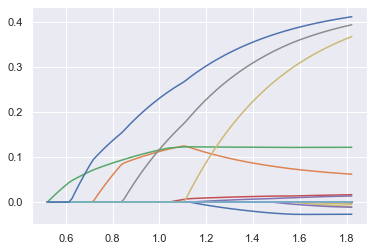

In [41]:
plt.figure()
neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(neg_log_alphas_lasso, coef_l)
alphas_lasso

In [42]:
lassolf = LogisticRegression(penalty='l1', solver='liblinear',
                               intercept_scaling=True).fit(X_train, y_train)

In [43]:
predictions = lassolf.predict(X_test)
y_scores = lassolf.predict_proba(X_test)[:,1]

In [44]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lassolf, X=X_train, y=y_train, cv=10)
print(modelAccuracies.mean())

0.6668749999999999


In [45]:
# check CFM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_scores))

[[680 320]
 [367 633]]


              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1000
           1       0.66      0.63      0.65      1000

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000

roc_auc_score for Logistic Regression:  0.7162055


## Multiple - MODEL

roc_auc_score for DecisionTree:  0.6316984999999999
roc_auc_score for Logistic Regression:  0.7314165


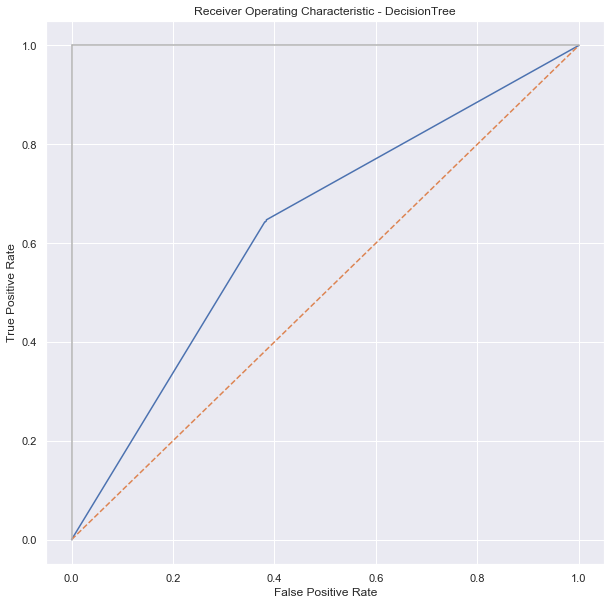

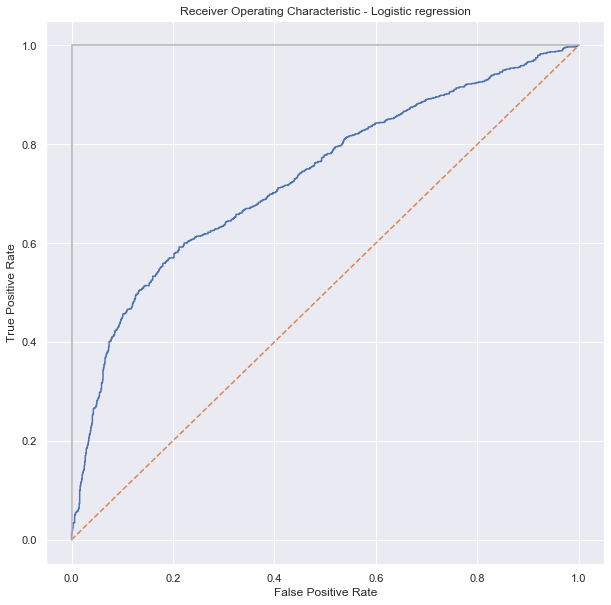

In [46]:
from sklearn import preprocessing

quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train = quantile_transformer.fit_transform(X_train)
X_test = quantile_transformer.transform(X_test)

# Creating classifier
clf_tree = DecisionTreeClassifier(); clf_reg = LogisticRegression(penalty='l1',solver='liblinear'); 

# Training model
clf_tree.fit(X_train, y_train); clf_reg.fit(X_train, y_train);

# Getting predicted probabilities
y_score1 = clf_tree.predict_proba(X_test)[:,1]
y_score2 = clf_reg.predict_proba(X_test)[:,1]

# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
#false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [47]:
# MODELING

# 1. Decision Tree
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)
y_scores = tree_model.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for Decision Tree
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=tree_model, X=X_train, y=y_train, cv=10)
print("Accuracy score of the Decision Tree model is: ",modelAccuracies.mean())
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_scores))


# 2. K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)
y_scores = knn.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for K-Nearest Neighbors
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
print('Accuracy score of the KNN model is : ',modelAccuracies.mean())
print('roc_auc_score for the KNN model: ', roc_auc_score(y_test, y_scores))

# 3. Logistic Regression

lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
y_scores = lr.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for Logistic Regression
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print('Accuracy score of the Logistic Regression model is : ',modelAccuracies.mean())
print('roc_auc_score for the Logistic Regression model: ', roc_auc_score(y_test, y_scores))
      
      
# 4. SVM 
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
y_scores = svm.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for SVM 
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10)
print('Accuracy score of the SVM model is : ',modelAccuracies.mean())
print('roc_auc_score for the SVM model: ', roc_auc_score(y_test, y_scores))
      

# 5. Random Forest Tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)
y_scores = rf.predict_proba(X_test)[:,1]
#K-Fold Cross Validation for Random Forest Tree
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print('Accuracy score of the Random Forest Tree model is : ',modelAccuracies.mean())
print('roc_auc_score for the Random Forest Tree model: ', roc_auc_score(y_test, y_scores))
      

Accuracy score of the Decision Tree model is:  0.69025
roc_auc_score for Decision Tree:  0.7365740000000001
Accuracy score of the KNN model is :  0.6305
roc_auc_score for the KNN model:  0.7057665
Accuracy score of the Logistic Regression model is :  0.679
roc_auc_score for the Logistic Regression model:  0.7314084999999999
Accuracy score of the SVM model is :  0.701875
roc_auc_score for the SVM model:  0.7522095000000001
Accuracy score of the Random Forest Tree model is :  0.7056250000000001
roc_auc_score for the Random Forest Tree model:  0.757285


In [48]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [49]:
# Compute confusion matrix for the models
from sklearn.metrics import confusion_matrix
tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree

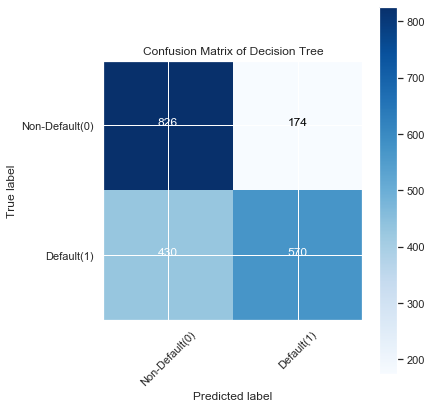

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      1000
           1       0.77      0.57      0.65      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.69      2000
weighted avg       0.71      0.70      0.69      2000



In [50]:
# Plot the confusion matrix
import itertools   
plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                     classes = ['Non-Default(0)','Default(1)'], 
                                     normalize = False, 
                                     title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

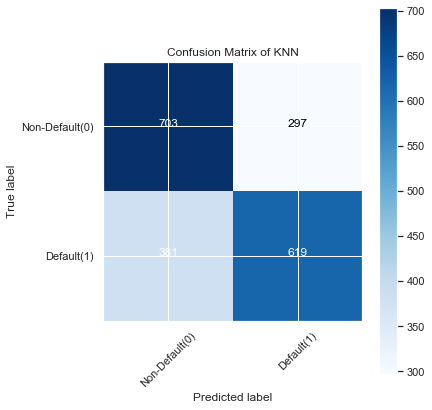

              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1000
           1       0.68      0.62      0.65      1000

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



In [51]:
# 2. K-Nearest Neighbors

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()
print(classification_report(y_test, knn_yhat))

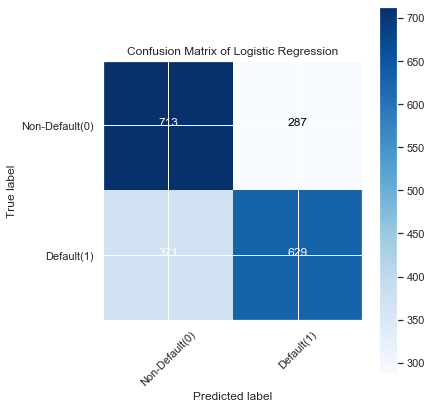

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      1000
           1       0.69      0.63      0.66      1000

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



In [52]:
# 3. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

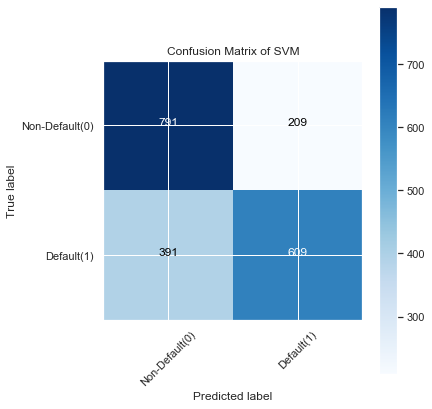

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1000
           1       0.74      0.61      0.67      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000



In [53]:
# 4. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

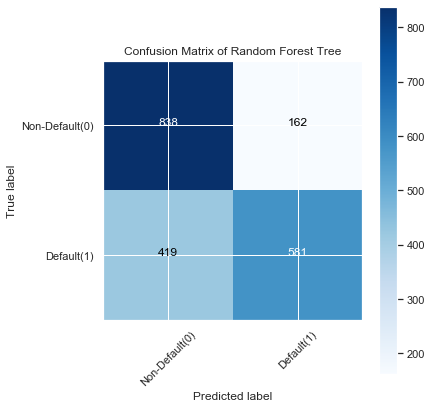

              precision    recall  f1-score   support

           0       0.67      0.84      0.74      1000
           1       0.78      0.58      0.67      1000

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.70      2000
weighted avg       0.72      0.71      0.70      2000



In [54]:
# 5. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()
print(classification_report(y_test, rf_yhat))

## Ensemble Voting Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [56]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [57]:
eclf =  VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft',
        flatten_transform=True)
eclf = eclf.fit(X_train, y_train)
eclf_pre = eclf.predict(X_test)
y_scores = eclf.predict_proba(X_test)[:,1]

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
print(classification_report(y_test, eclf_pre))

              precision    recall  f1-score   support

           0       0.80      0.20      0.32      1000
           1       0.54      0.95      0.69      1000

    accuracy                           0.58      2000
   macro avg       0.67      0.58      0.51      2000
weighted avg       0.67      0.58      0.51      2000



/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

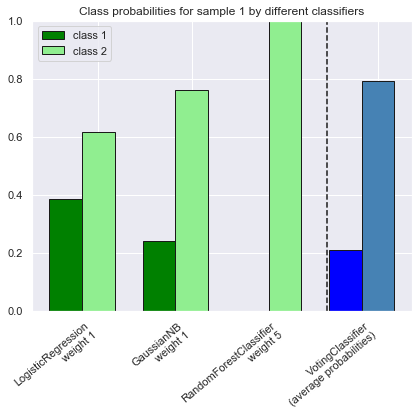

In [59]:
# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'GaussianNB\nweight 1',
                    'RandomForestClassifier\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()

## Gradient Boosting Regressor

In [89]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120) 
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred)         
     for y_pred in gbrt.staged_predict(X_test)] 
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators) 
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=115,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
mse = mean_squared_error(y_test, gbrt_best.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.1947


## MODEL - Random Forest 

In [63]:
# training a random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Create random forest classifier object using entropy

randomforest_entropy = RandomForestClassifier(criterion = 'entropy', random_state=0, oob_score = True)

# train model
randomforest_entropy.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
# predict target
preds = randomforest_entropy.predict(X_test)
y_scores = randomforest_entropy.predict_proba(X_test)[:,1]

In [66]:
# use the out-of-bag score
print(randomforest_entropy.oob_score_)

0.693625


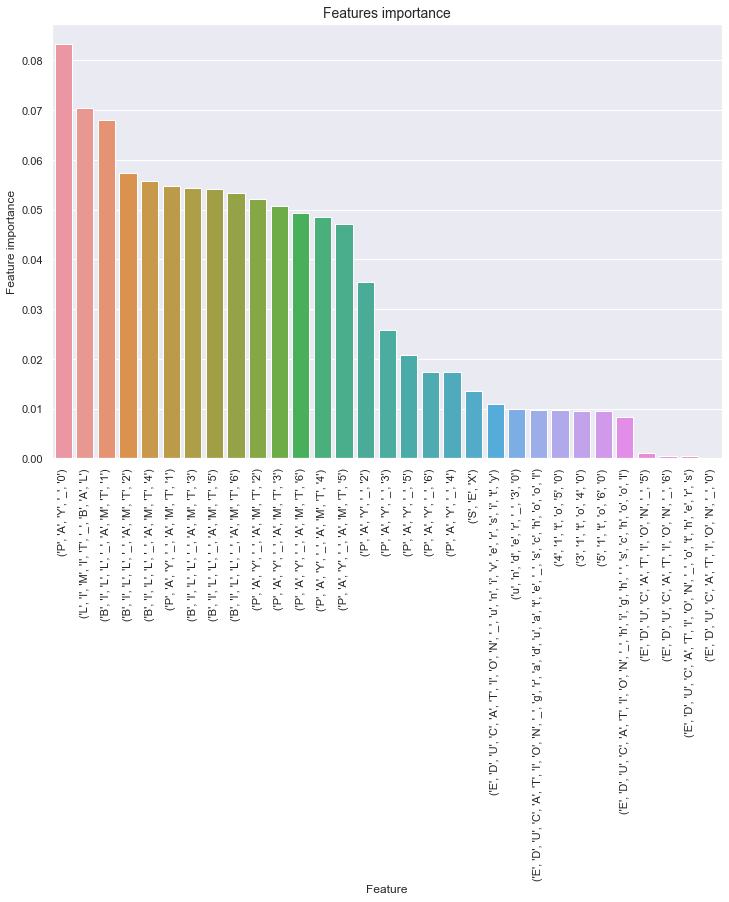

In [67]:
# Identifying Important Features in Random Forests
tmp = pd.DataFrame({'Feature': X, 'Feature importance': randomforest_entropy.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (12,8))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [68]:
# check CFM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[775 225]
 [367 633]]


              precision    recall  f1-score   support

           0       0.68      0.78      0.72      1000
           1       0.74      0.63      0.68      1000

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000



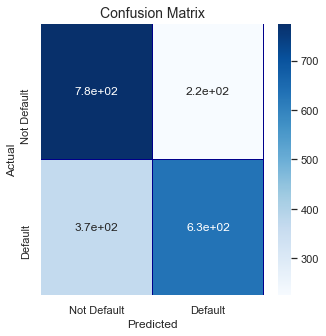

In [69]:
cm = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Calculating oob using different metrics

In [70]:
print(randomforest_entropy.oob_decision_function_)

[[0.78787879 0.21212121]
 [0.05714286 0.94285714]
 [0.81818182 0.18181818]
 ...
 [0.         1.        ]
 [0.76923077 0.23076923]
 [0.53571429 0.46428571]]


In [71]:
from sklearn import metrics
pred_train = np.argmax(randomforest_entropy.oob_decision_function_,axis=1)

In [77]:
metrics.roc_auc_score(y_train, pred_train)

0.693625

## MODEL - Decision Tree Classifier

In [78]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
# Create decision tree classifier object using entropy
from sklearn import tree

Accuracy is 69.39999999999999
Confusion Matrix is [[83400 16600]
 [44600 55400]]
Recall is 55.400000000000006
Precision is 76.94444444444444
[[834 166]
 [446 554]]


              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1000
           1       0.77      0.55      0.64      1000

    accuracy                           0.69      2000
   macro avg       0.71      0.69      0.69      2000
weighted avg       0.71      0.69      0.69      2000

ROC&AUC score:  0.7403420000000001


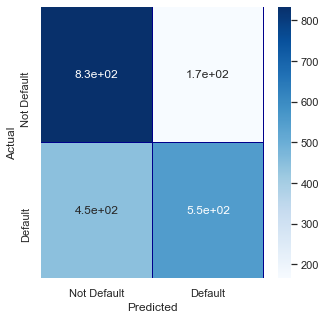

In [83]:

clf_entropy = DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=10)
model7 = clf_entropy.fit(X_train,y_train)

y_pred_en = clf_entropy.predict(X_test)
y_scores = clf_entropy.predict_proba(X_test)[:,1]
cm = pd.crosstab(y_test, y_pred_en, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
#calculatiog accuracy
print(("Accuracy is"),accuracy_score(y_test,y_pred_en)*100)
print(("Confusion Matrix is"),confusion_matrix(y_test,y_pred_en)*100)
print(("Recall is"),recall_score(y_test,y_pred_en)*100)
print(("Precision is"),precision_score(y_test,y_pred_en)*100)

print(confusion_matrix(y_test, y_pred_en))
print('\n')
print(classification_report(y_test, y_pred_en))

print("ROC&AUC score: ", roc_auc_score(y_test, y_scores))

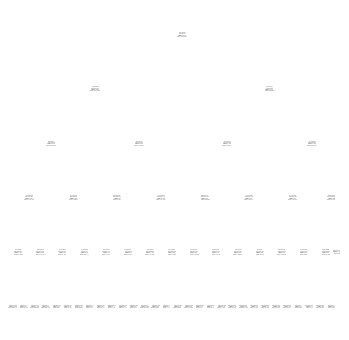

In [84]:
# The decision tree creation
tree.plot_tree(model7)
plt.savefig('DT.pdf')
plt.show()

In [1]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeRegressor  

/Users/wangtingting/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


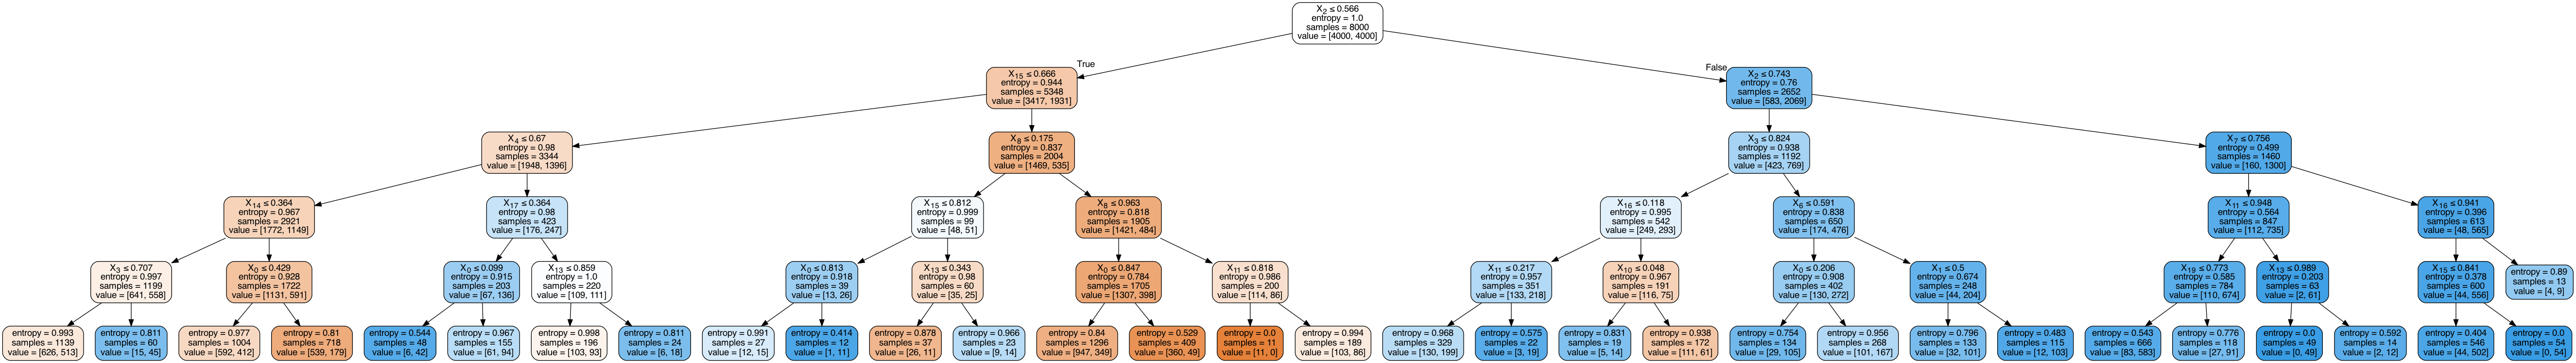

In [86]:
# build a tree graph
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 